In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Set data type
DTYPE='float32'
tf.keras.backend.set_floatx(DTYPE)
# Set number of data points
N_0 = 10000
N_db = 100
N_nb1 = 100
N_nb2 = 100
N_r = 10000

# Set boundary
tmin = 0.
tmax = 1.

x1min = 0.
x1max = 1.

x2min = 0.
x2max = 1.

# Lower bounds
lb = tf.constant([tmin, x1min], dtype=DTYPE)
# Upper bounds
ub = tf.constant([tmax, x1max], dtype=DTYPE)

In [7]:
model = tf.keras.models.load_model('saved_model/1DHeatTransferNaturalBC-flux100t')

In [8]:
N = 100
time = 1.0
x1space = np.linspace(lb[1], ub[1], N + 1)
X1 = np.meshgrid(x1space)
Xgrid = np.vstack([np.ones(((N+1),), dtype=DTYPE) * time, X1]).T
upred = model(tf.cast(Xgrid,DTYPE))
# Reshape upred
U = upred.numpy().reshape(N+1)

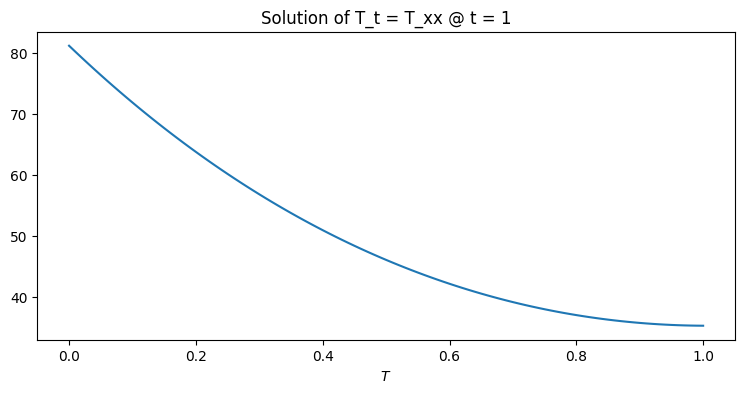

In [10]:
# Surface plot of solution u(t,x)
fig = plt.figure(figsize=(9,4))
ax = fig.add_subplot(111)
ax.plot(X1[0], U);
ax.set_xlabel('$x$')
ax.set_xlabel('$T$')
ax.set_title('Solution of T_t = T_xx @ t = 1');